In [1]:
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idg
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
sns.set()

In [2]:
path = 'C:/Users/KUSHAGRA/Downloads/Pnemonia Detection/chest_xray/'

In [3]:
train_data = os.path.join(path, 'train')
test_data = os.path.join(path, 'test')
validation_data = os.path.join(path, 'val')

In [4]:
print(test_data) 
print(os.listdir(test_data))

C:/Users/KUSHAGRA/Downloads/Pnemonia Detection/chest_xray/test
['NORMAL', 'PNEUMONIA']


In [5]:
train_datagen = idg(rescale=1.0/255,
                   width_shift_range=0.2,
                   shear_range=20,
                   zoom_range=0.2,
                   horizontal_flip=True,
                   fill_mode='nearest')

validation_datagen = idg(rescale=1.0/255,
                   width_shift_range=0.2,
                   shear_range=20,
                   zoom_range=0.2,
                   horizontal_flip=True,
                   fill_mode='nearest')

In [6]:
model1 = VGG16(include_top=False, weights='imagenet')
for x in model1.layers:
    x.trainable = False

x = model1.output

x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(model1.input, x)

lr = 0.01
lr_scheduler = tf.keras.optimizers.schedules.ExponentialDecay(lr, decay_steps=100000, decay_rate=0.95, staircase=True)

model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.RMSprop(lr_scheduler),
             metrics=['accuracy'])

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [8]:
train_ds = train_datagen.flow_from_directory(train_data, target_size=(150, 150), batch_size=16, class_mode='binary')

validation_ds = validation_datagen.flow_from_directory(validation_data, target_size=(150, 150), batch_size=8, class_mode='binary')

test_ds = validation_datagen.flow_from_directory(test_data, target_size=(150, 150), batch_size=32, class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [9]:
history = model.fit(train_ds, steps_per_epoch=100, epochs=20, validation_data=validation_ds, verbose=2)

Epoch 1/20
100/100 - 59s - loss: 0.4276 - accuracy: 0.8119 - val_loss: 0.8519 - val_accuracy: 0.7500 - 59s/epoch - 591ms/step
Epoch 2/20
100/100 - 55s - loss: 0.2906 - accuracy: 0.8675 - val_loss: 0.6031 - val_accuracy: 0.7500 - 55s/epoch - 554ms/step
Epoch 3/20
100/100 - 55s - loss: 0.2427 - accuracy: 0.8869 - val_loss: 0.9515 - val_accuracy: 0.6875 - 55s/epoch - 551ms/step
Epoch 4/20
100/100 - 55s - loss: 0.2527 - accuracy: 0.8956 - val_loss: 1.2682 - val_accuracy: 0.6250 - 55s/epoch - 550ms/step
Epoch 5/20
100/100 - 57s - loss: 0.2242 - accuracy: 0.9112 - val_loss: 1.4281 - val_accuracy: 0.5625 - 57s/epoch - 571ms/step
Epoch 6/20
100/100 - 61s - loss: 0.2091 - accuracy: 0.9175 - val_loss: 1.2326 - val_accuracy: 0.7500 - 61s/epoch - 615ms/step
Epoch 7/20
100/100 - 60s - loss: 0.2234 - accuracy: 0.9137 - val_loss: 0.2028 - val_accuracy: 0.9375 - 60s/epoch - 604ms/step
Epoch 8/20
100/100 - 61s - loss: 0.1982 - accuracy: 0.9194 - val_loss: 0.4388 - val_accuracy: 0.8125 - 61s/epoch - 606

In [14]:
accuracy = model.evaluate_generator(test_ds,624)[1]
print()
print()
print('The testing Accuracy is : '+ str(round(accuracy,3)))



The testing Accuracy is : 0.872


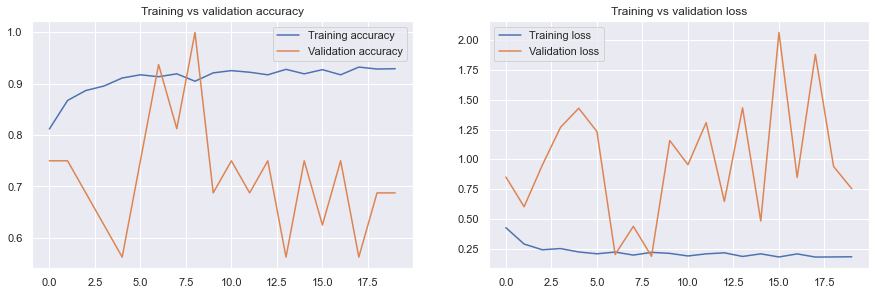

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label = "Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")

''' Training Loss and Validation Loss graph '''
plt.subplot(2,2,2)
plt.plot(history.history['loss'], label = "Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

In [16]:
model.save('model.h5')